In [17]:
from set_device import ncp, Target
from gpe import *
from time_advance import *
import init_cond
import para
import my_fft
import matplotlib.pyplot as plt

In [18]:
G=GPE()
G.set_arrays()
init_cond.initcond(G)
G.wfc = G.wfc/G.norm()**0.5


In [19]:
print(G.norm())

1.0000000000000002


In [20]:
vx,vy=G.velocity()
print(vx[10,4],vy[10,4])
theta=ncp.angle(G.wfc)
vx=ncp.gradient(theta)[0]

vy=ncp.gradient(theta)[1]
print(vx[10,4])

print(vy[10,4])






(29.361772256161185+4.5154343367798635j) (-29.606935479623193+1.2354050570184005j)
0.39349013942734534
-1.866874228150058


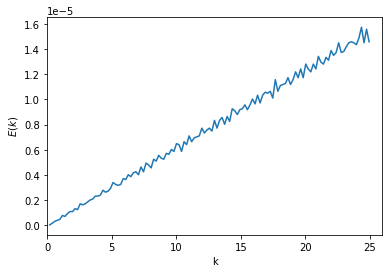

In [21]:
G.wfck=my_fft.forward_transform(G.wfc)
k,spectrumE=G.spectrum(ncp.abs(G.wfck)**2)
plt.plot(k,spectrumE)
plt.xlabel("k")
plt.ylabel(r"$E(k)$")
plt.xlim([0,k[-1]+1])
# plt.ylim([0,1.1])
plt.show()

In [22]:
def fun():
    return(ncp.sin(my_fft.x_mesh)*ncp.sin(my_fft.y_mesh))
G.wfc=fun()
vx,vy=G.velocity()
print(vx[10,4],vy[10,4])
theta=ncp.angle(G.wfc)
vx=ncp.gradient(theta)[0]

vy=ncp.gradient(theta)[1]
print(vx[10,4])

print(vy[10,4])





(0.06278713466027463-0.3084251375340432j) (6.909055833099693-0.3084251375340483j)
0.0
0.0


In [54]:
L=4*ncp.pi
N=512

dx=L/N
j=ncp.arange(0,N)
x=j*dx
y=ncp.cos(3*x)



[  0.           0.07957747   0.15915494   0.23873241   0.31830989
   0.39788736   0.47746483   0.5570423    0.63661977   0.71619724
   0.79577472   0.87535219   0.95492966   1.03450713   1.1140846
   1.19366207   1.27323954   1.35281702   1.43239449   1.51197196
   1.59154943   1.6711269    1.75070437   1.83028185   1.90985932
   1.98943679   2.06901426   2.14859173   2.2281692    2.30774667
   2.38732415   2.46690162   2.54647909   2.62605656   2.70563403
   2.7852115    2.86478898   2.94436645   3.02394392   3.10352139
   3.18309886   3.26267633   3.3422538    3.42183128   3.50140875
   3.58098622   3.66056369   3.74014116   3.81971863   3.89929611
   3.97887358   4.05845105   4.13802852   4.21760599   4.29718346
   4.37676094   4.45633841   4.53591588   4.61549335   4.69507082
   4.77464829   4.85422576   4.93380324   5.01338071   5.09295818
   5.17253565   5.25211312   5.33169059   5.41126807   5.49084554
   5.57042301   5.65000048   5.72957795   5.80915542   5.88873289
   5.968310

(-1.0, 1.0)

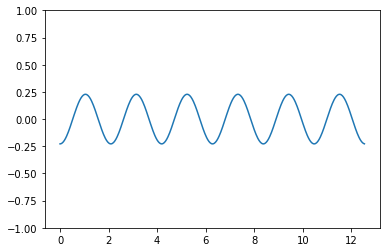

In [56]:
k=ncp.fft.fftfreq(N,dx)
print(k)

y=ncp.fft.ifft(1j*k*ncp.fft.fft(y))
plt.plot(x,y.real)
plt.ylim([-1,1])

